In [11]:
from data import get_solanki_data, plot_data, get_silso_data, centre_x
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import GPy

warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


### Solanki data

In [3]:
data = get_solanki_data()
data.head()

,YearBP,SN,sigma
0,11405,37.4,20.7
1,11395,57.1,20.1
2,11385,89.0,32.1
3,11375,92.5,34.5
4,11365,75.2,29.9


In [4]:
# YearBP is Year Before Present, where Present is 1950.
# Add a column that is going to represent the calendar year (with BC years displayed as negative)
data['Yc'] = 1950 - data['YearBP']

In [5]:
data.tail()

,YearBP,SN,sigma,Yc
1131,95,48.7,8.5,1855
1132,85,55.0,12.7,1865
1133,75,40.0,13.3,1875
1134,65,27.0,9.4,1885
1135,55,28.7,9.9,1895


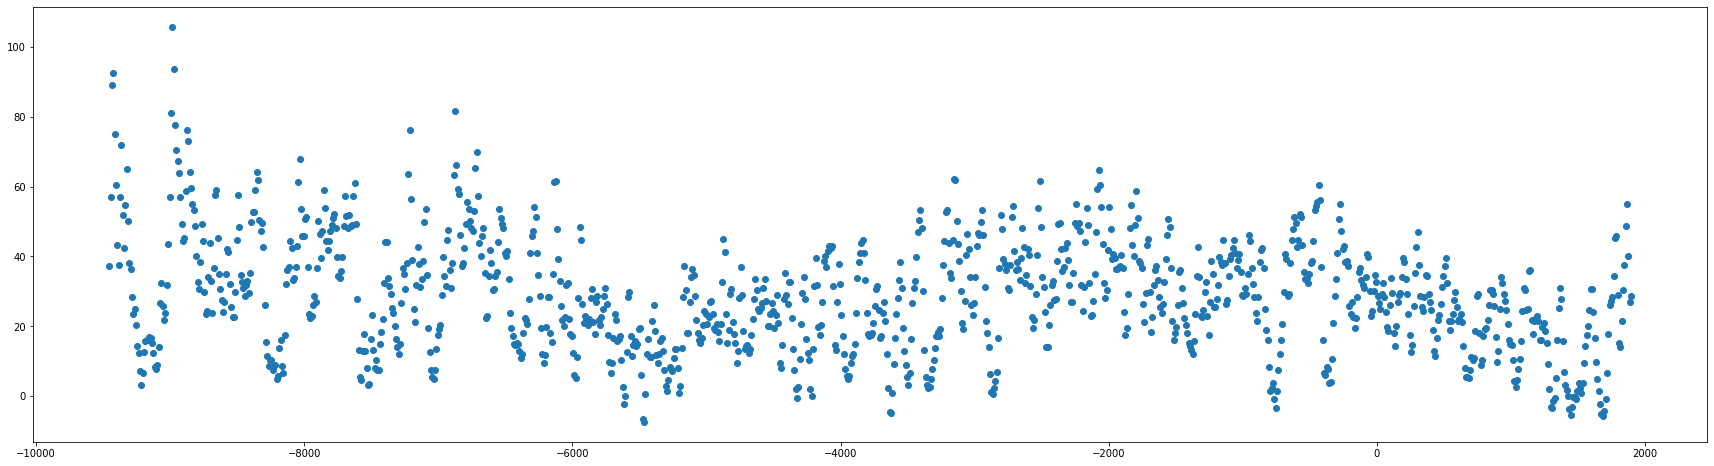

In [6]:
fig, ax = plot_data(data, 'Yc', 'SN')

### SWPC data

In [19]:
silso_data = get_silso_data('SN_ms_tot_V2.0')
silso_data = centre_x(silso_data)
silso_data.drop(silso_data[silso_data.ssn_total == -1].index, inplace=True)

../data/SILSO data/SN_ms_tot_V2.0.csv


In [8]:
def get_10_year_mean(silso_data):
    df = pd.DataFrame()
    df['year'] = silso_data.groupby(silso_data.index//120)['year'].median()
    df['SN'] = silso_data.groupby(silso_data.index//120)['ssn_total'].mean()
    return df

In [9]:
ten_y_silso_data = get_10_year_mean(silso_data)

(1700.0, 2022.0)

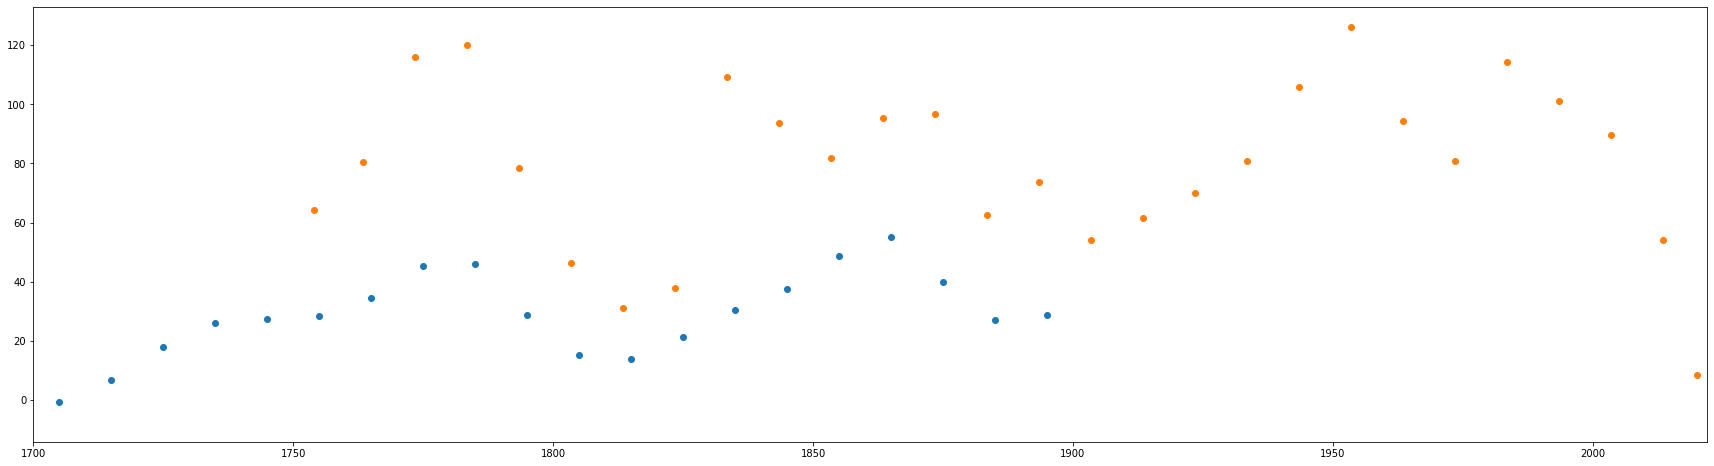

In [10]:
fig, ax = plot_data(data, 'Yc', 'SN')
ax.scatter(ten_y_silso_data['year'], ten_y_silso_data['SN'])
ax.set_xlim(1700, 2022)

In [222]:
k_noise = GPy.kern.White(1)
k_rq = GPy.kern.RatQuad(1) 
k_period = GPy.kern.StdPeriodic(1,period=500,lengthscale=0.1,variance=1)
k_mul = k_rq*k_period
k_add = k_mul

In [223]:
train_data_x = data['Yc'].iloc[:1120].to_numpy().reshape((-1, 1))
train_data_y = data['SN'].iloc[:1120].to_numpy().reshape((-1, 1))

m = GPy.models.GPRegression(train_data_x, train_data_y, k_mul)

In [224]:
m.optimize()

{'dataplot': [<matplotlib.collections.PathCollection at 0x7fec19222cd0>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7fec1922f250>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7fec1922f400>]}

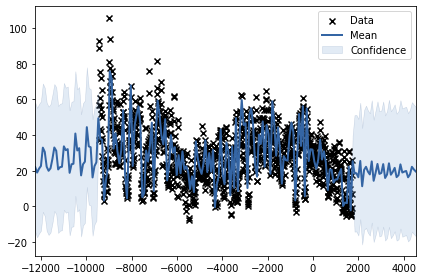

In [225]:
m.plot()

In [226]:
m

GP_regression.,value,constraints,priors
mul.RatQuad.variance,21.43533967183675,+ve,
mul.RatQuad.lengthscale,21.69005515191483,+ve,
mul.RatQuad.power,0.10572886455916161,+ve,
mul.std_periodic.variance,21.43533967182268,+ve,
mul.std_periodic.period,497.7773136905442,+ve,
mul.std_periodic.lengthscale,0.11613149757871354,+ve,
Gaussian_noise.variance,1.0038367322238722e-07,+ve,
